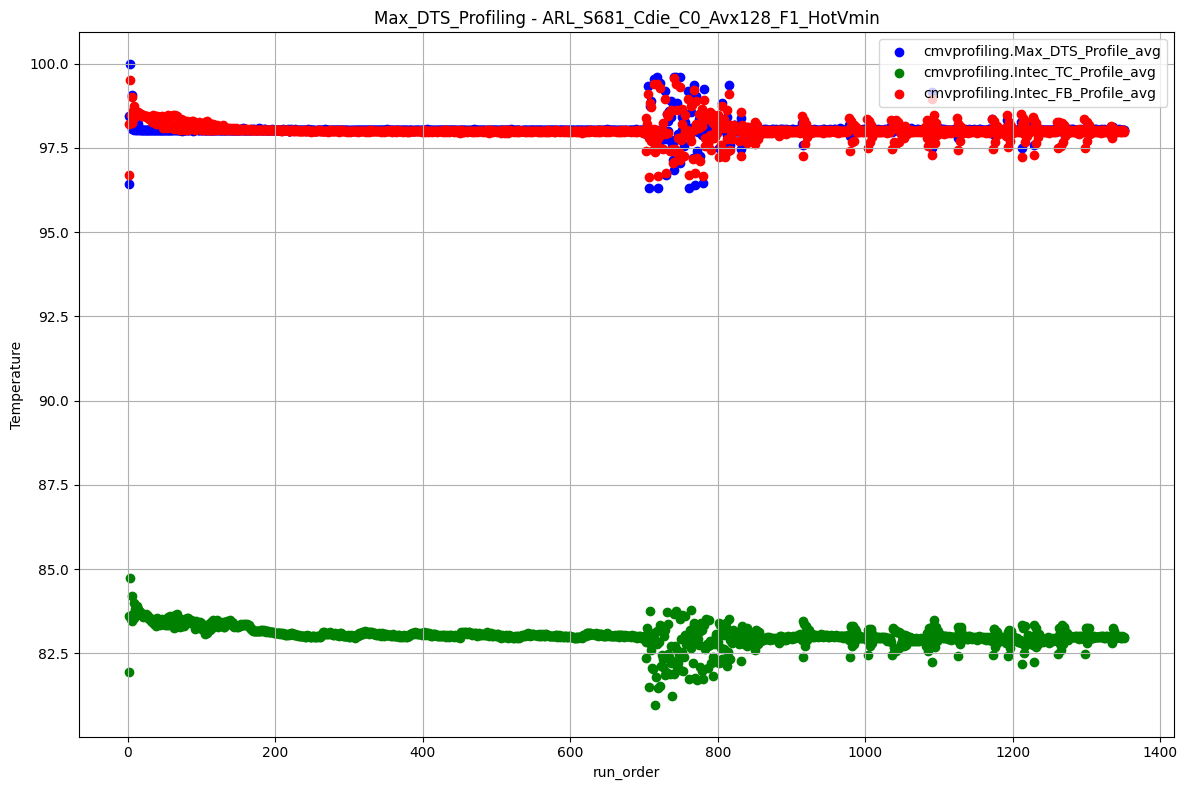

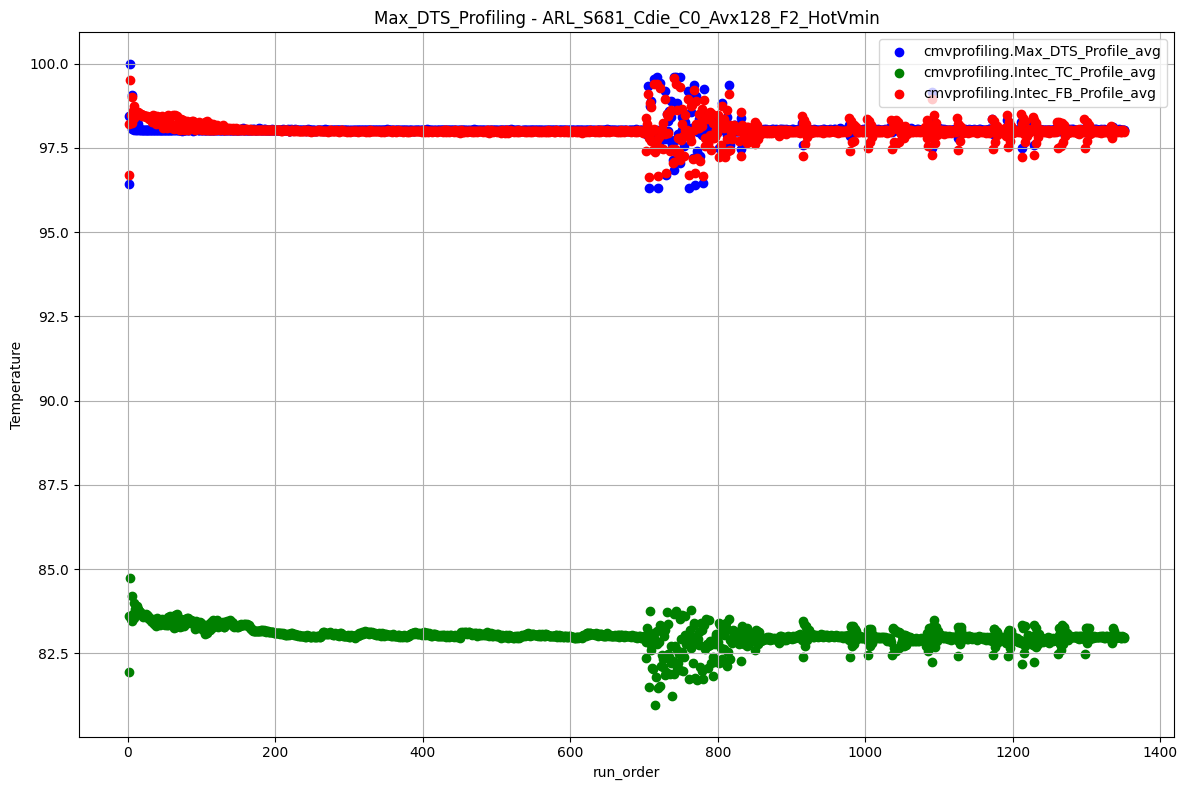

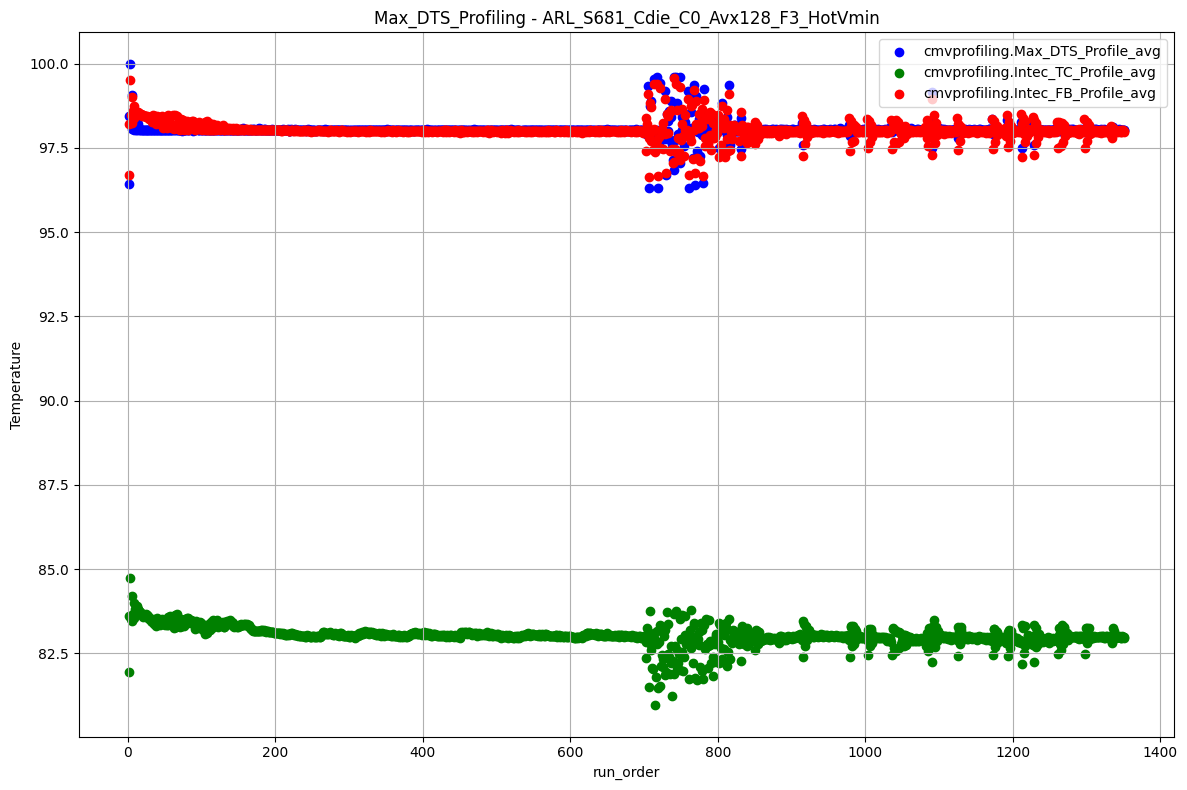

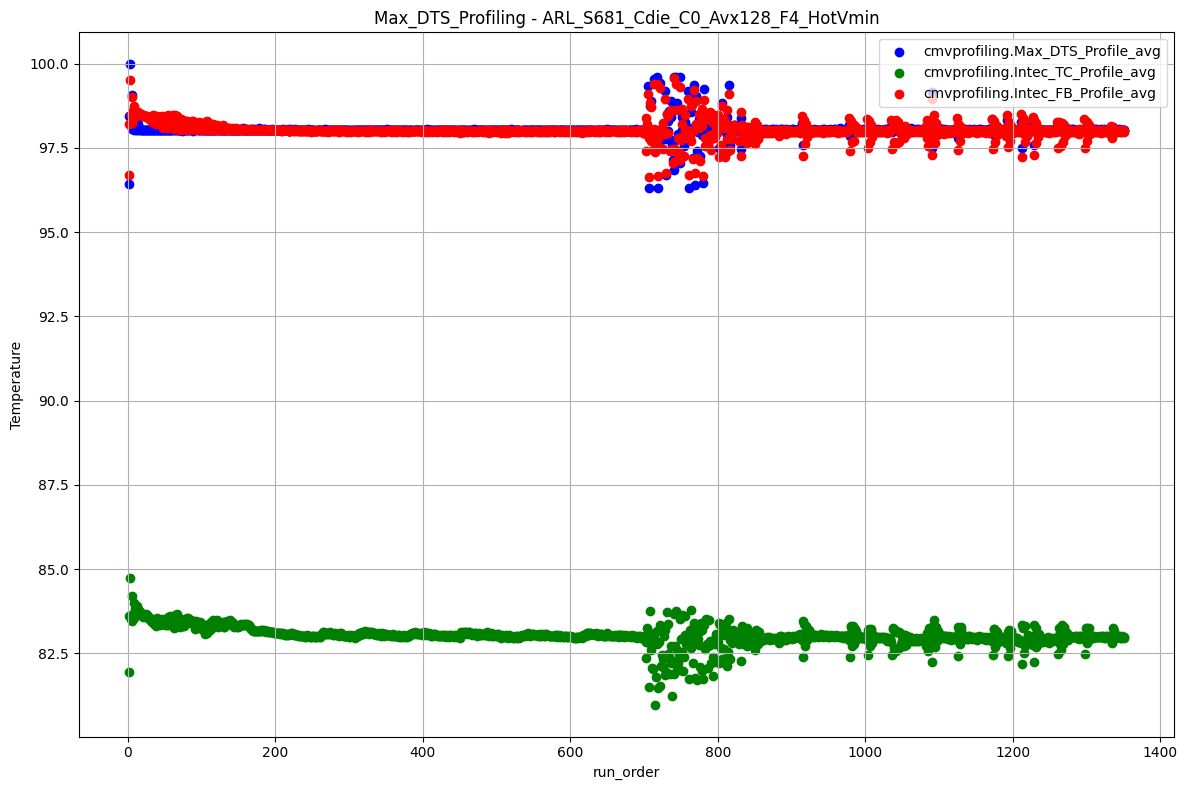

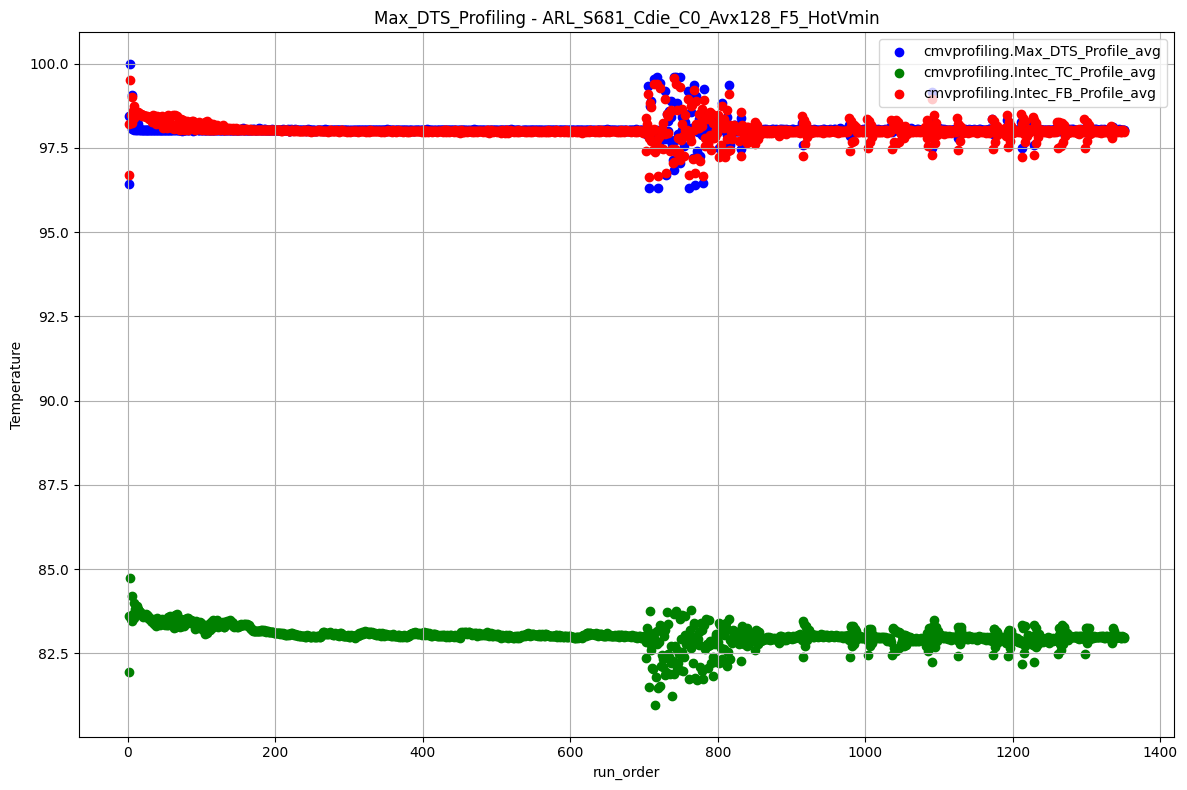

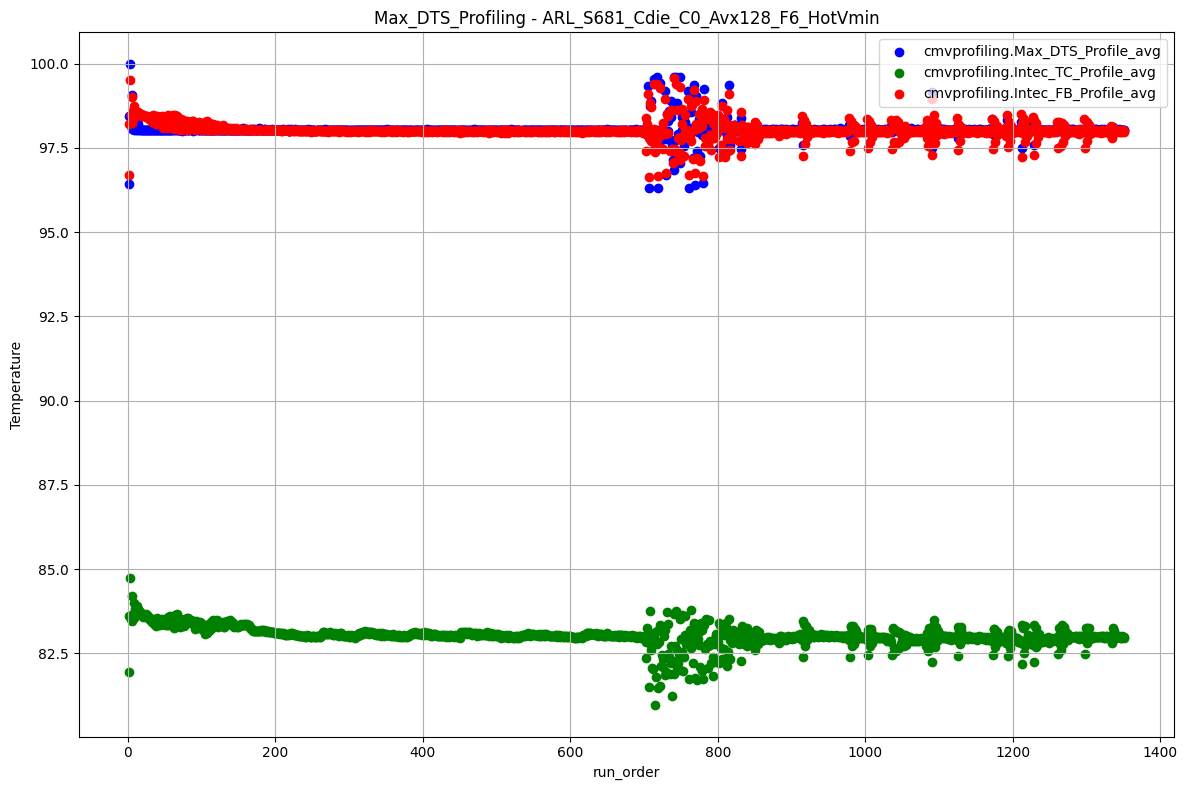

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the root directory
root_dir = r'U:\NVL\HX\A0\results_experimental\ThermalProfile'

# Dictionary to store data for each subfolder
subfolder_data = {}

# Function to process each file and store data by subfolder
def process_file(file_path, subfolder_name):
    try:
        # Skip temporary files (starting with ~) without printing a message
        if os.path.basename(file_path).startswith('~$'):
            return
        
        # Use pd.read_excel directly instead of ExcelFile
        df = pd.read_excel(file_path, sheet_name='SearchVoltage Results', engine='openpyxl')
        required_cols = ['run_order', 'cmvprofiling.Max_DTS_Profile_avg', 
                       'cmvprofiling.Intec_TC_Profile_avg', 'cmvprofiling.Intec_FB_Profile_avg']
        if all(col in df.columns for col in required_cols):
            # Initialize subfolder data if not present
            if subfolder_name not in subfolder_data:
                subfolder_data[subfolder_name] = {'run_x': [], 'dts_y': [], 'tc_y': [], 'fb_y': []}
            
            # Append data to the respective subfolder's lists
            subfolder_data[subfolder_name]['run_x'].extend(df['run_order'].dropna().tolist())
            subfolder_data[subfolder_name]['dts_y'].extend(df['cmvprofiling.Max_DTS_Profile_avg'].dropna().tolist())
            subfolder_data[subfolder_name]['tc_y'].extend(df['cmvprofiling.Intec_TC_Profile_avg'].dropna().tolist())
            subfolder_data[subfolder_name]['fb_y'].extend(df['cmvprofiling.Intec_FB_Profile_avg'].dropna().tolist())
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Traverse the directory structure
try:
    main_folders = [f for f in os.listdir(root_dir) if 'D3' in f or 'D4' in f]
    for main in main_folders:
        main_path = os.path.join(root_dir, main)
        # Get immediate subfolders under the main folder
        subfolders = [d for d in os.listdir(main_path) if os.path.isdir(os.path.join(main_path, d))]
        for subfolder in subfolders:
            subfolder_path = os.path.join(main_path, subfolder)
            for dirpath, dirnames, filenames in os.walk(subfolder_path):
                # Use the subfolder name for data separation
                subfolder_name = subfolder
                for filename in filenames:
                    if filename.endswith('.xlsx') and ('HotVmin' in filename or 'HotGNG' in filename):
                        file_path = os.path.join(dirpath, filename)
                        process_file(file_path, subfolder_name)
except Exception as e:
    print(f"Error traversing directories: {e}")

# Create a separate plot for each subfolder
for subfolder, data in subfolder_data.items():
    if data['run_x']:  # Only create plot if there is data
        plt.figure(figsize=(12, 8))
        plt.scatter(data['run_x'], data['dts_y'], color='blue', label='cmvprofiling.Max_DTS_Profile_avg')
        plt.scatter(data['run_x'], data['tc_y'], color='green', label='cmvprofiling.Intec_TC_Profile_avg')
        plt.scatter(data['run_x'], data['fb_y'], color='red', label='cmvprofiling.Intec_FB_Profile_avg')

        plt.title(f'Max_DTS_Profiling - {subfolder}')
        plt.xlabel('run_order')
        plt.ylabel('Temperature')
        plt.legend(loc='upper right')
        plt.grid(True)
        plt.tight_layout()
        plt.show()